**1. Data Collection and Cleaning.**

1.1 Importing libraries.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

1.2 Reading the csv file.

In [2]:
path = "/content/drive/MyDrive/data.csv"
df = pd.read_csv(path)
df. head()

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
0,False,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,2528,0,39,100075,221,10,1,28,14,0
1,True,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,...,1934,2,39,-1,16,10,2,22,19,1
2,False,1005,0,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,2552,3,167,100202,23,10,3,23,18,0
3,False,1002,0,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,0fa578fd,...,2478,3,167,100074,23,10,2,22,19,0
4,True,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,...,1722,0,35,-1,79,10,1,21,8,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   click             99999 non-null  bool  
 1   C1                99999 non-null  int64 
 2   banner_pos        99999 non-null  int64 
 3   site_id           99999 non-null  object
 4   site_domain       99999 non-null  object
 5   site_category     99999 non-null  object
 6   app_id            99999 non-null  object
 7   app_domain        99999 non-null  object
 8   app_category      99999 non-null  object
 9   device_id         99999 non-null  object
 10  device_ip         99999 non-null  object
 11  device_model      99999 non-null  object
 12  device_type       99999 non-null  int64 
 13  device_conn_type  99999 non-null  int64 
 14  C14               99999 non-null  int64 
 15  C15               99999 non-null  int64 
 16  C16               99999 non-null  int64 
 17  C17         

1.3 Missing Value Treatment

In [4]:
df.isnull().sum()

click               0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
month               0
dayofweek           0
day                 0
hour                0
y                   0
dtype: int64

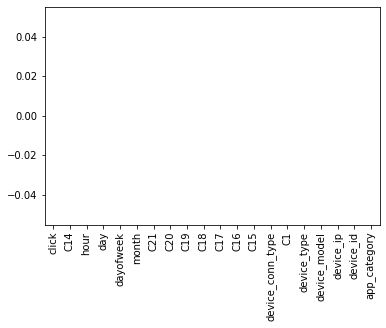

In [5]:
#Plotting the missing values columns.
missing_data = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False).head(20)
missing_data.plot.bar()

There are no null values.




**2. Categorical Variable Treatment**


In [6]:
df.columns

Index(['click', 'C1', 'banner_pos', 'site_id', 'site_domain', 'site_category',
       'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip',
       'device_model', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16',
       'C17', 'C18', 'C19', 'C20', 'C21', 'month', 'dayofweek', 'day', 'hour',
       'y'],
      dtype='object')

In [7]:
#Dropping the unnecesary columns
df = df.drop(['click', 'month', 'device_ip', 'device_id' ,'C14', 'C15', 'C16',
       'C17', 'C18', 'C19', 'C20', 'C21', 'C1'], axis = 1)
df.head()

,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_model,device_type,device_conn_type,dayofweek,day,hour,y
0,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,be6db1d7,1,0,1,28,14,0
1,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,1b13b020,1,0,2,22,19,1
2,0,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,9a45a8e8,1,0,3,23,18,0
3,0,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,ea6abc60,0,0,2,22,19,0
4,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,36d749e5,1,0,1,21,8,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   banner_pos        99999 non-null  int64 
 1   site_id           99999 non-null  object
 2   site_domain       99999 non-null  object
 3   site_category     99999 non-null  object
 4   app_id            99999 non-null  object
 5   app_domain        99999 non-null  object
 6   app_category      99999 non-null  object
 7   device_model      99999 non-null  object
 8   device_type       99999 non-null  int64 
 9   device_conn_type  99999 non-null  int64 
 10  dayofweek         99999 non-null  int64 
 11  day               99999 non-null  int64 
 12  hour              99999 non-null  int64 
 13  y                 99999 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 10.7+ MB


In [9]:
df.nunique()

banner_pos             7
site_id             1485
site_domain         1331
site_category         19
app_id              1354
app_domain            96
app_category          21
device_model        3145
device_type            4
device_conn_type       4
dayofweek              7
day                   10
hour                  24
y                      2
dtype: int64

In [10]:
#label encoding to the columns with high nunique values.
  #Importing label encoder
from sklearn import preprocessing
  # instantiate labelencoder object
label_encoder = preprocessing.LabelEncoder()
  
col = ['site_id', 'site_domain', 'site_category', 'app_domain', 'app_id', 'device_model', 'app_category']
df[col]= df[col].apply(label_encoder.fit_transform)
df.head()


,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_model,device_type,device_conn_type,dayofweek,day,hour,y
0,1,784,461,17,1254,38,0,2288,1,0,1,28,14,0
1,1,1287,673,17,1254,38,0,342,1,0,2,22,19,1
2,0,1293,1112,1,1254,38,0,1862,1,0,3,23,18,0
3,0,80,182,5,1254,38,0,2863,0,0,2,22,19,0
4,0,179,1272,1,1254,38,0,682,1,0,1,21,8,1


In [11]:
#One-Hot Encoding to the columns with low nunique values.
    #Importing OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
     # instantiate OneHotEncoder object
ohe = OneHotEncoder()

col_1 = ['banner_pos' , 'device_type' , 'device_conn_type']
df = pd.get_dummies(df, columns = col_1, drop_first=True)
df.head()

,site_id,site_domain,site_category,app_id,app_domain,app_category,device_model,dayofweek,day,hour,...,banner_pos_3,banner_pos_4,banner_pos_5,banner_pos_7,device_type_1,device_type_4,device_type_5,device_conn_type_2,device_conn_type_3,device_conn_type_5
0,784,461,17,1254,38,0,2288,1,28,14,...,0,0,0,0,1,0,0,0,0,0
1,1287,673,17,1254,38,0,342,2,22,19,...,0,0,0,0,1,0,0,0,0,0
2,1293,1112,1,1254,38,0,1862,3,23,18,...,0,0,0,0,1,0,0,0,0,0
3,80,182,5,1254,38,0,2863,2,22,19,...,0,0,0,0,0,0,0,0,0,0
4,179,1272,1,1254,38,0,682,1,21,8,...,0,0,0,0,1,0,0,0,0,0


 **3. Train-Test Split**

In [12]:
X = df.drop(['y'], axis=1)
y = df['y']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 1000)

**4. Classification Methods.**

4.1 Linear Regression Model

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.coef_


array([[ 7.42559736e-05, -6.21242154e-04, -3.04633298e-02,
         3.88365980e-04, -6.58357085e-03, -1.00378580e-02,
         1.50345034e-06,  1.94331841e-03, -4.06776524e-02,
         1.83742373e-03,  1.67135761e-03, -1.41472601e-05,
         6.60877680e-06, -3.50467089e-05, -1.58627587e-05,
         2.48092396e-04, -2.44537723e-03, -1.19348889e-03,
        -1.08758191e-04, -2.85004541e-03, -5.65687887e-03,
        -1.61838799e-04]])

In [15]:
#To check the Accuracy (y_train)
from sklearn import metrics
y_train_pred = lr.predict(X_train)
print(metrics.accuracy_score(y_train, y_train_pred) )

0.8307228840360504


In [16]:
#To check the Accuracy (y_test)
y_new = lr.predict(X_test)
print(metrics.accuracy_score(y_test, y_new) )

0.8281


[[16562     0]
 [ 3438     0]]


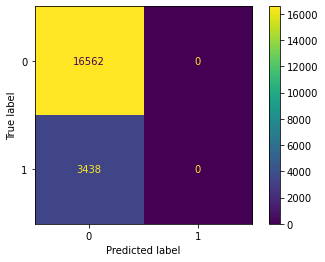

In [17]:
#Confusion Matrix 
cnf_mat_lr = metrics.confusion_matrix(y_test, y_new)
print(cnf_mat_lr)
metrics.plot_confusion_matrix(lr, X_test, y_test)

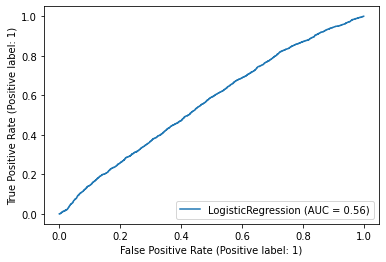

In [18]:
#Arear under ROC Curve
metrics.plot_roc_curve(lr, X_test, y_test)
plt.show()

In [19]:
#To check the Precision and Recall
from sklearn.metrics import precision_score, recall_score
print('lr Precision:', precision_score(y_test, y_new))
print('lr Recall:',  recall_score(y_test, y_new))

lr Precision: 0.0
lr Recall: 0.0


4.2 Decision Tree Model

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train , y_train)

DecisionTreeClassifier()

In [21]:
#To check the Accuracy (X_test)
y_new = dt.predict(X_test)
from sklearn.metrics import classification_report
metrics.accuracy_score(y_test, y_new) 

0.75255

[[14144  2418]
 [ 2531   907]]


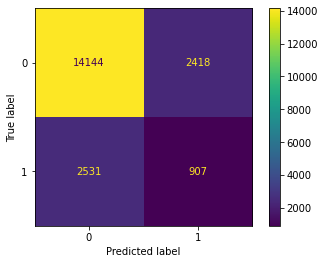

In [22]:
#Confusion Matrix 
cn_mat = metrics.confusion_matrix(y_test, y_new)
print(cn_mat)
metrics.plot_confusion_matrix(dt, X_test, y_test)

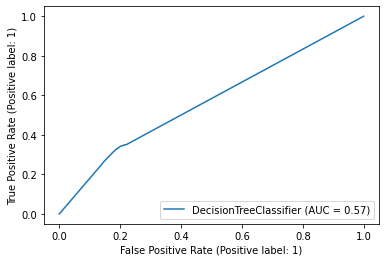

In [23]:
#Arear under ROC Curve
metrics.plot_roc_curve(dt, X_test, y_test)
plt.show()

In [24]:
#To check the Precision and Recall
from sklearn.metrics import precision_score, recall_score
print('Precision:', precision_score(y_test, y_new))
print('Recall:',  recall_score(y_test, y_new))

Precision: 0.27278195488721807
Recall: 0.2638161721931355


4.3 Random Forest Model.

In [25]:
#importing randomforest 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train , y_train)

RandomForestClassifier()

In [26]:
#To check the Accuracy (X_test)
y_new = rf.predict(X_test)
from sklearn.metrics import classification_report
metrics.accuracy_score(y_test, y_new) 

0.79925

[[15381  1181]
 [ 2834   604]]


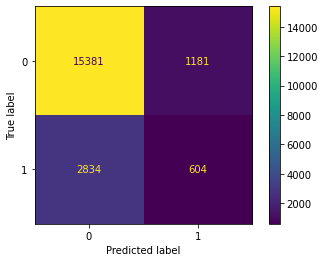

In [27]:
#Confusion Matrix 
cnf_mat = metrics.confusion_matrix(y_test, y_new)
print(cnf_mat)
metrics.plot_confusion_matrix(rf, X_test, y_test)

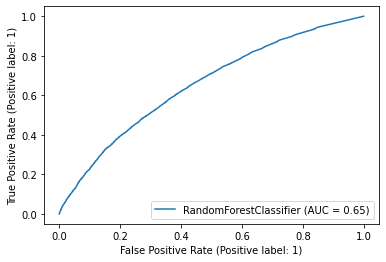

In [28]:
#Arear under ROC Curve
metrics.plot_roc_curve(rf, X_test, y_test)
plt.show()

In [29]:
#To check the Precision and Recall
from sklearn.metrics import precision_score, recall_score
print('Precision:', precision_score(y_test, y_new))
print('Recall:',  recall_score(y_test, y_new))

Precision: 0.33837535014005604
Recall: 0.17568353694008143


**5. K-Fold Cross-Validation**

In [30]:
#Cross-Validation for Logistic Regression model.
from sklearn.model_selection import KFold, cross_val_score

scores_lr = cross_val_score(lr, X_train, y_train, cv = 5, n_jobs=-1)
print("Cross Validation Scores: ", scores_lr)
print("Average CV Score: ", scores_lr.mean())

Cross Validation Scores:  [0.83075    0.83075    0.8306875  0.8306875  0.83073942]
Average CV Score:  0.8307228842427652


In [31]:
#Create a dataframe to store the results.
entry = {'Model': ["Baseline"],
         'Precision' : ['0'],
         'Recall' : ['0'],
         'CrossVal_Mean': [scores_lr.mean()],         
         'CrossVal1(r2)': [scores_lr[0]],
         'CrossVal2(r2)': [scores_lr[1]],
         'CrossVal3(r2)': [scores_lr[2]],
         'CrossVal4(r2)': [scores_lr[3]],
         'CrossVal5(r2)': [scores_lr[4]],
        }

result = pd.DataFrame(entry)
result

,Model,Precision,Recall,CrossVal_Mean,CrossVal1(r2),CrossVal2(r2),CrossVal3(r2),CrossVal4(r2),CrossVal5(r2)
0,Baseline,0,0,0.830723,0.83075,0.83075,0.830688,0.830688,0.830739


In [32]:
#Cross-Validation for Decision Tree model.
from sklearn.model_selection import KFold, cross_val_score

scores_dt = cross_val_score(dt, X_train, y_train, cv = 5, n_jobs=-1)
print("Cross Validation Scores: ", scores_dt)
print("Average CV Score: ", scores_dt.mean())

Cross Validation Scores:  [0.756      0.7501875  0.753      0.751125   0.74435902]
Average CV Score:  0.7509343044877805


In [33]:
#Create a dataframe to store the results.
entry_1 = {'Model': ["Decision Tree"],
         'Precision' : ['0.2693'],
         'Recall' : ['0.2609'],
         'CrossVal_Mean': [scores_dt.mean()],         
         'CrossVal1(r2)': [scores_dt[0]],
         'CrossVal2(r2)': [scores_dt[1]],
         'CrossVal3(r2)': [scores_dt[2]],
         'CrossVal4(r2)': [scores_dt[3]],
         'CrossVal5(r2)': [scores_dt[4]],
        }

result_1 = pd.DataFrame(entry_1)
result = pd.concat([result,result_1])
result

,Model,Precision,Recall,CrossVal_Mean,CrossVal1(r2),CrossVal2(r2),CrossVal3(r2),CrossVal4(r2),CrossVal5(r2)
0,Baseline,0,0,0.830723,0.83075,0.830750,0.830688,0.830688,0.830739
0,Decision Tree,0.2693,0.2609,0.750934,0.75600,0.750188,0.753000,0.751125,0.744359


In [34]:
#Cross-Validation for Random Forest model.
from sklearn.model_selection import KFold, cross_val_score

scores_rf = cross_val_score(rf, X_train, y_train, cv = 5, n_jobs=-1)
print("Cross Validation Scores: ", scores_rf)
print("Average CV Score: ", scores_rf.mean())

Cross Validation Scores:  [0.7985     0.794625   0.8005     0.8035625  0.79173698]
Average CV Score:  0.7977848967122945


In [35]:
#Create a dataframe to store the results.
entry_1 = {'Model': ["Random Forest"],
         'Precision' : ['0.3436'],
         'Recall' : ['0.1800'],
         'CrossVal_Mean': [scores_rf.mean()],         
         'CrossVal1(r2)': [scores_rf[0]],
         'CrossVal2(r2)': [scores_rf[1]],
         'CrossVal3(r2)': [scores_rf[2]],
         'CrossVal4(r2)': [scores_rf[3]],
         'CrossVal5(r2)': [scores_rf[4]],
        }

result_2 = pd.DataFrame(entry_1)
result = pd.concat([result,result_2])
result

,Model,Precision,Recall,CrossVal_Mean,CrossVal1(r2),CrossVal2(r2),CrossVal3(r2),CrossVal4(r2),CrossVal5(r2)
0,Baseline,0,0,0.830723,0.83075,0.830750,0.830688,0.830688,0.830739
0,Decision Tree,0.2693,0.2609,0.750934,0.75600,0.750188,0.753000,0.751125,0.744359
0,Random Forest,0.3436,0.1800,0.797785,0.79850,0.794625,0.800500,0.803562,0.791737


**6. Based on the above evaluation metrics Logistic Regression seems to be the best method amongst the 3 models.**

**7. Feature Selection- RFE**

In [36]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [37]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [46]:
rfe = RFE(lm, n_features_to_select = None)
rfe = rfe.fit(X_train, y_train)

In [47]:
# Train a new linear model with RFE selected columns 
linear_regressor = LinearRegression()             
linear_regressor.fit(X_train[col],y_train)

LinearRegression()

In [48]:
# Calculate the cross vall scores for the new model
crossvalidation = cross_val_score(linear_regressor, X_train[col], y_train, cv=5, n_jobs=-1).mean()
crossvalidation

0.012998705550833933

In [49]:
 # predictions on the train set. 
y_pred = linear_regressor.predict(X_train[col])
#r2 and rmse value for the new model
r2_val = r2_score(y_train,y_pred)
rmse_error = mean_squared_error (y_train, y_pred, squared = False)

In [50]:
# maintain a list for performance to analyze in future
i_list = []
r2_list = []
rmse_list = []
cross_val_list = []

i_list.append(i)
r2_list.append(r2_val)
rmse_list.append(rmse_error)
cross_val_list.append(crossvalidation)

In [45]:
#Printing the outputs
print (i)
print ("R2 score for the model is :",r2_val )
print ("RMSE error for the model is :",rmse_error )
print ("Mean Cross Validation Score (r2) :",crossvalidation )
print ("==================================================")

247
R2 score for the model is : 0.013825503812316509
RMSE error for the model is : 0.37239521856139673
Mean Cross Validation Score (r2) : 0.012998705550833933
